In [2]:
import rospy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bagpy import bagreader
from scipy.spatial.transform import Rotation as R

Python older than 3.7 detected. 


In [111]:
b = bagreader('../data/raw/razor_yaw/yaw_80.bag')

"""
imu_data = b.message_by_topic('/razor/imu')
df_imu = pd.read_csv(imu_data)
df_imu.to_csv(os.path.join(outdir,'imu_data.csv'))
"""

[INFO]  Successfully created the data folder ../data/raw/razor_yaw/yaw_80.


"\nimu_data = b.message_by_topic('/razor/imu')\ndf_imu = pd.read_csv(imu_data)\ndf_imu.to_csv(os.path.join(outdir,'imu_data.csv'))\n"

In [112]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/razor/imu,sensor_msgs/Imu,454,49.962525
1,/razor/yaw,std_msgs/Float64,453,49.854145


In [ ]:
imu_data = b.message_by_topic('/vesc/odom')
imu_yaw = b.message_by_topic('/razor/imu')
df_imu = pd.read_csv(imu_data)

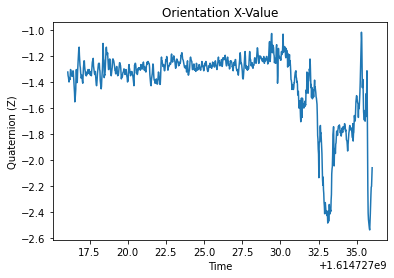

In [196]:
plt.plot(df_imu['Time'], df_imu['linear_acceleration.x'])
plt.title('Orientation X-Value')
plt.xlabel('Time')
plt.ylabel('Quaternion (Z)')
plt.show()

In [197]:
quat = np.array([df_imu['orientation.x'], df_imu['orientation.y'], df_imu['orientation.y'], df_imu['orientation.z']])

In [199]:
quat = quat.reshape(len(quat[0]), 4)

In [528]:
df.head()

,0,1,2
0,88.636657,0.659002,89.901169
1,91.299235,-0.589696,90.032070
2,89.726420,0.073309,89.591024
3,90.639528,-0.390112,90.102506
4,88.788394,0.429186,89.781563


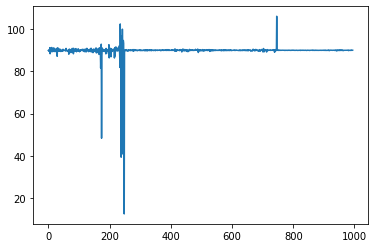

In [529]:
plt.plot(df[2])

In [60]:
import math
 
def euler_from_quaternion(x, y, z, w):
        """
        Convert a quaternion into euler angles (roll, pitch, yaw)
        roll is rotation around x in radians (counterclockwise)
        pitch is rotation around y in radians (counterclockwise)
        yaw is rotation around z in radians (counterclockwise)
        """
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
     
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
     
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
     
        return roll_x, pitch_y, yaw_z # in radians

In [211]:
yaw_deg = [x*180/math.pi for x in yaw_array]

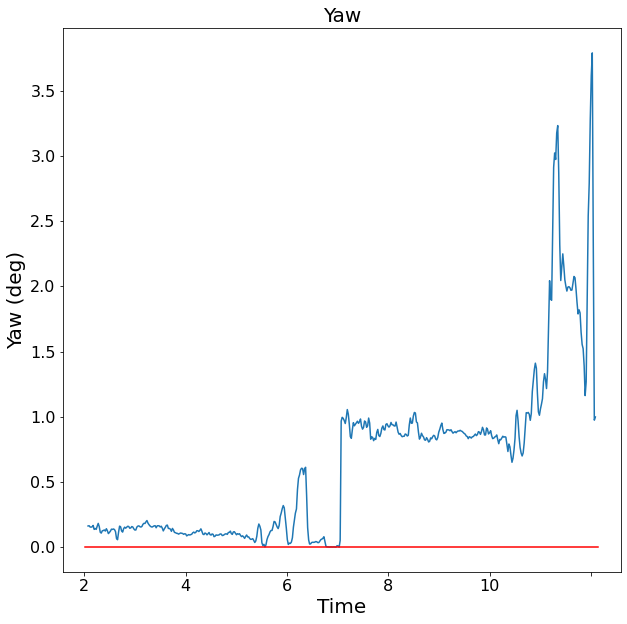

In [214]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(df_imu['Time'][0:500], yaw_deg[0:500])
#plt.plot(df_yaw_test['data'])
plt.axhline(y=0, color='red', xmin=0.04, xmax=0.96)
plt.title('Yaw', fontsize=20)

plt.xlabel('Time', fontsize=20)
plt.ylabel('Yaw (deg)', fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.set_xticklabels(labels=['0', '2', '4', '6', '8', '10'])


plt.show()

In [42]:
df_imu = pd.read_csv('../data/clean/razor_imu/imu_30.csv')

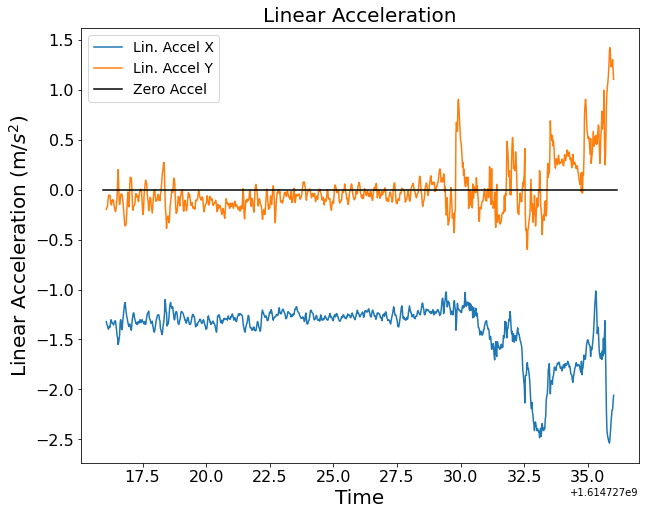

In [43]:
plt.figure(figsize=(10,8))
plt.plot(df_imu['Time'], df_imu['linear_acceleration.x'], label='Lin. Accel X')
plt.plot(df_imu['Time'], df_imu['linear_acceleration.y'], label='Lin. Accel Y')
plt.axhline(y=0, color='black', xmin=0.04, xmax=0.96, label= 'Zero Accel')

plt.xlabel('Time', fontsize=20)
plt.ylabel('Linear Acceleration (m/$s^2$)', fontsize=20)

plt.legend(fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Linear Acceleration', fontsize=20)

plt.show()

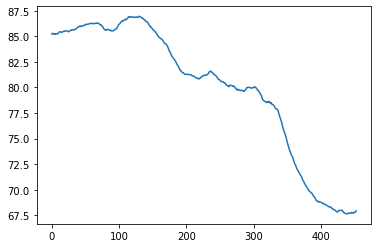

In [502]:
plt.plot(df_yaw_test['data'])

In [478]:
gt = np.ones(550) * 90

In [480]:
np.mean((yaw_deg[:550] - gt))

0.14192792369536825

In [120]:
b2 = bagreader('../data/raw/razor_yaw/yaw_80.bag')
imu_d = b2.message_by_topic('/razor/yaw')
df_yaw = pd.read_csv(imu_d)

[INFO]  Data folder ../data/raw/razor_yaw/yaw_80 already exists. Not creating.


(array([65., 70., 75., 80., 85., 90., 95.]),
 <a list of 7 Text major ticklabel objects>)

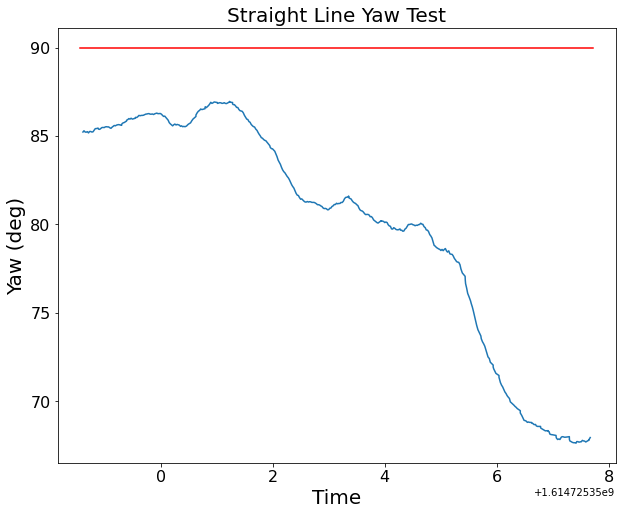

In [124]:
plt.figure(figsize=(10,8))
plt.plot(df_yaw['Time'], df_yaw['data'])

plt.axhline(y=90, color='red', xmin=0.04, xmax=0.96)

plt.title('Straight Line Yaw Test', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Yaw (deg)', fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [121]:
b2.topic_table

,Topics,Types,Message Count,Frequency
0,/razor/imu,sensor_msgs/Imu,454,49.962525
1,/razor/yaw,std_msgs/Float64,453,49.854145


In [48]:
quat = np.array([df_yaw['orientation.x'], df_yaw['orientation.y'], df_yaw['orientation.y'], df_yaw['orientation.z']])

In [93]:
br = bagreader('../data/raw/razor_imu/imu_30.bag')

[INFO]  Successfully created the data folder ../data/raw/razor_imu/imu_30.


In [94]:
br.topic_table

,Topics,Types,Message Count,Frequency
0,/razor/imu,sensor_msgs/Imu,995,49.879935


In [ ]:
imu_d = br.message_by_topic('/razor/imu')
df_yaw = pd.read_csv(imu_d)

In [96]:
df_yaw.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,orientation.x,orientation.y,orientation.z,orientation.w,orientation_covariance_0,...,linear_acceleration.z,linear_acceleration_covariance_0,linear_acceleration_covariance_1,linear_acceleration_covariance_2,linear_acceleration_covariance_3,linear_acceleration_covariance_4,linear_acceleration_covariance_5,linear_acceleration_covariance_6,linear_acceleration_covariance_7,linear_acceleration_covariance_8
0,1.614727e+09,13717,1614727016,76102733,base_imu_link,-0.026120,0.064141,0.291501,0.954060,0.0025,...,9.652781,0.04,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.04
1,1.614727e+09,13718,1614727016,96288204,base_imu_link,-0.026384,0.064153,0.291350,0.954098,0.0025,...,9.629032,0.04,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.04
2,1.614727e+09,13719,1614727016,116506338,base_imu_link,-0.026710,0.064326,0.291364,0.954073,0.0025,...,9.662357,0.04,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.04
3,1.614727e+09,13720,1614727016,136442899,base_imu_link,-0.027059,0.064490,0.291710,0.953947,0.0025,...,9.724794,0.04,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.04
4,1.614727e+09,13721,1614727016,156556844,base_imu_link,-0.027152,0.064733,0.291956,0.953852,0.0025,...,9.825152,0.04,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.04


In [81]:
quat = np.array([df_yaw['orientation.x'], 
                 df_yaw['orientation.y'], 
                 df_yaw['orientation.y'], 
                 df_yaw['orientation.z']])

In [82]:
quat = quat.reshape(len(quat[0]), 4)

In [83]:
temp1 = [euler_from_quaternion(arr[0], arr[1], arr[2], arr[3]) for arr in quat]
temp1[:10]

[(0.0028308265859006104, 3.2480443801687444e-05, 0.002831800907747141),
 (0.002863798280186071, -2.9397196108734645e-05, 0.0028643528168161565),
 (0.0026942627579454436, 3.438072584609737e-06, 0.0026942076811513936),
 (0.002677622093543331, -1.8183443644580235e-05, 0.0026777174102060926),
 (0.0027233986815915607, 2.0350909813123264e-05, 0.002724116529857286),
 (0.0029022845860274256, -2.7077796516685594e-05, 0.002901803400937337),
 (0.002374398528127721, -1.9713413306765388e-05, 0.0023732429895229803),
 (0.0024975208640627138, -2.2188908840788452e-06, 0.0024975146237923218),
 (0.0023810259627128783, -6.222003845230109e-06, 0.0023808804166144297),
 (0.0027995481617201666, 0.00010281861785622695, 0.0028083567862709526)]

In [84]:
yaw_array = [t[2] for t in temp1]
yaw_deg = [x*180/math.pi for x in yaw_array]

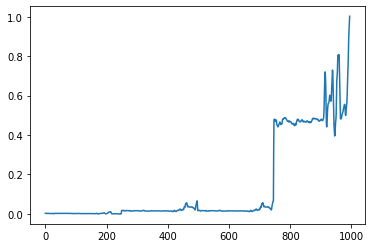

In [97]:
plt.plot(yaw_array)

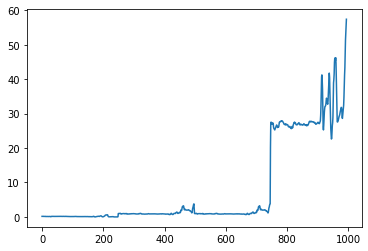

In [86]:
plt.plot(yaw_deg)

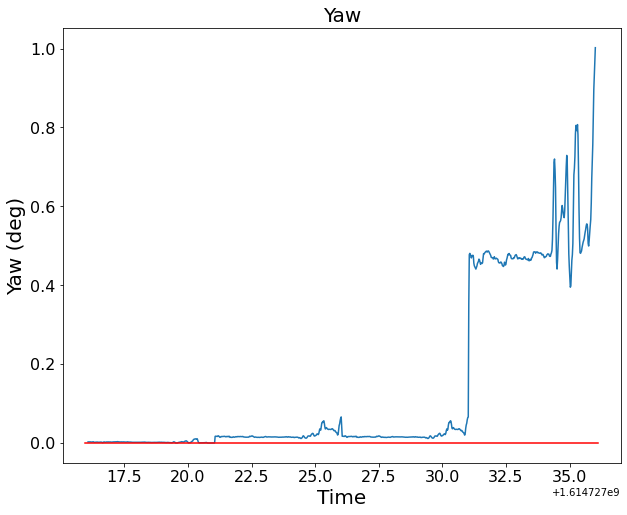

In [106]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(df_yaw['Time'], yaw_array)
#plt.plot(df_yaw_test['data'])
plt.axhline(y=0, color='red', xmin=0.04, xmax=0.96)
plt.title('Yaw', fontsize=20)

plt.xlabel('Time', fontsize=20)
plt.ylabel('Yaw (deg)', fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#ax.set_xticklabels(labels=['0', '2', '4', '6', '8', '10'])

#plt.ylim(0,100)

plt.show()

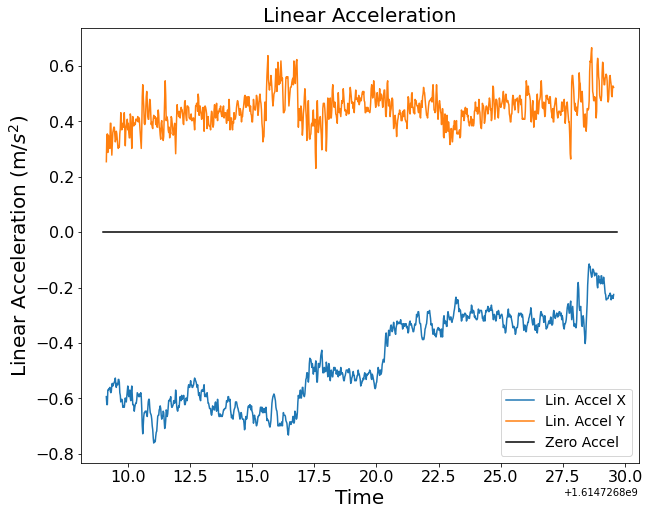

In [167]:
fig, ax = fig, ax = plt.subplots(figsize=(10,8))
x_line = plt.plot(df_yaw['Time'], df_yaw['linear_acceleration.x'], label='Lin. Accel X')
y_line = plt.plot(df_yaw['Time'], df_yaw['linear_acceleration.y'], label='Lin. Accel Y')
i_line = plt.axhline(y=0, color='black', xmin=0.04, xmax=0.96, label= 'Zero Accel')

plt.xlabel('Time', fontsize=20)
plt.ylabel('Linear Acceleration (m/$s^2$)', fontsize=20)

#plt.legend(handles=[x_line, y_line, i_line], labels=['Lin. Accel X', 'Lin. Accel Y', 'Ideal at Rest'])
plt.legend(fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Linear Acceleration', fontsize=20)

plt.show()

In [215]:
b3 = bagreader('../data/raw/vesc_servo_gain_m1_1.bag')
imu_d = b3.message_by_topic('/odometry/filtered')
df_yaw = pd.read_csv(imu_d)

[INFO]  Data folder ../data/raw/vesc_servo_gain_m1_1 already exists. Not creating.


In [216]:
b3.topic_table

,Topics,Types,Message Count,Frequency
0,/odometry/filtered,nav_msgs/Odometry,542,22.918066
1,/vesc/odom,nav_msgs/Odometry,857,54.658882
2,razor/imu,sensor_msgs/Imu,615,49.890615


In [225]:
odom_filter = b3.message_by_topic('/odometry/filtered')
df_odom_filt = pd.read_csv(odom_filter)

In [226]:
df_odom_filt.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,child_frame_id,pose.pose.position.x,pose.pose.position.y,pose.pose.position.z,pose.pose.orientation.x,...,pose.pose.orientation.z,pose.pose.orientation.w,pose.covariance,twist.twist.linear.x,twist.twist.linear.y,twist.twist.linear.z,twist.twist.angular.x,twist.twist.angular.y,twist.twist.angular.z,twist.covariance
0,1.614559e+09,1285,1614558961,459846020,map,base_link,0.017124,0.019572,0.0,0.0,...,-0.582898,0.812545,"(2.1414158090323743, -3.3436834569373368e-09, ...",-0.000723,0.002479,0.0,0.0,0.0,5.419852e-07,"(0.0006226036065649394, 0.0, 0.0, 0.0, 0.0, 0...."
1,1.614559e+09,1286,1614558961,499871016,map,base_link,0.017151,0.019591,0.0,0.0,...,-0.582762,0.812643,"(2.1434171876611643, -3.3478515133695145e-09, ...",-0.000715,0.002432,0.0,0.0,0.0,2.353868e-07,"(0.000609941035422666, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,1.614559e+09,1287,1614558961,519947052,map,base_link,0.017156,0.019595,0.0,0.0,...,-0.582762,0.812643,"(2.1444210752637383, -3.3508214361181766e-09, ...",-0.000117,0.000396,0.0,0.0,0.0,2.987748e-13,"(9.895061797724677e-05, 0.0, 0.0, 0.0, 0.0, 0...."
3,1.614559e+09,1288,1614558961,560184002,map,base_link,0.017240,0.019656,0.0,0.0,...,-0.582866,0.812568,"(2.1464332919309297, -3.3565929734582818e-09, ...",-0.001341,0.004469,0.0,0.0,0.0,-1.039401e-06,"(0.0011095061759862977, 0.0, 0.0, 0.0, 0.0, 0...."
4,1.614559e+09,1289,1614558961,600284100,map,base_link,0.017262,0.019670,0.0,0.0,...,-0.582805,0.812612,"(2.1484383163268195, -3.3610809508442404e-09, ...",-0.001202,0.004067,0.0,0.0,0.0,-2.012750e-07,"(0.0010063698891333364, 0.0, 0.0, 0.0, 0.0, 0...."


In [228]:
df_odom_filt.to_csv('odom_filtered.csv')

In [229]:
x = pd.read_csv('odom_filtered.csv')
x.head()

,Unnamed: 0,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,child_frame_id,pose.pose.position.x,pose.pose.position.y,pose.pose.position.z,...,pose.pose.orientation.z,pose.pose.orientation.w,pose.covariance,twist.twist.linear.x,twist.twist.linear.y,twist.twist.linear.z,twist.twist.angular.x,twist.twist.angular.y,twist.twist.angular.z,twist.covariance
0,0,1.614559e+09,1285,1614558961,459846020,map,base_link,0.017124,0.019572,0.0,...,-0.582898,0.812545,"(2.1414158090323743, -3.3436834569373368e-09, ...",-0.000723,0.002479,0.0,0.0,0.0,5.419852e-07,"(0.0006226036065649394, 0.0, 0.0, 0.0, 0.0, 0...."
1,1,1.614559e+09,1286,1614558961,499871016,map,base_link,0.017151,0.019591,0.0,...,-0.582762,0.812643,"(2.1434171876611643, -3.3478515133695145e-09, ...",-0.000715,0.002432,0.0,0.0,0.0,2.353868e-07,"(0.000609941035422666, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,1.614559e+09,1287,1614558961,519947052,map,base_link,0.017156,0.019595,0.0,...,-0.582762,0.812643,"(2.1444210752637383, -3.3508214361181766e-09, ...",-0.000117,0.000396,0.0,0.0,0.0,2.987748e-13,"(9.895061797724677e-05, 0.0, 0.0, 0.0, 0.0, 0...."
3,3,1.614559e+09,1288,1614558961,560184002,map,base_link,0.017240,0.019656,0.0,...,-0.582866,0.812568,"(2.1464332919309297, -3.3565929734582818e-09, ...",-0.001341,0.004469,0.0,0.0,0.0,-1.039401e-06,"(0.0011095061759862977, 0.0, 0.0, 0.0, 0.0, 0...."
4,4,1.614559e+09,1289,1614558961,600284100,map,base_link,0.017262,0.019670,0.0,...,-0.582805,0.812612,"(2.1484383163268195, -3.3610809508442404e-09, ...",-0.001202,0.004067,0.0,0.0,0.0,-2.012750e-07,"(0.0010063698891333364, 0.0, 0.0, 0.0, 0.0, 0...."


In [122]:
b4 = bagreader('../data/raw/yaw-bags-2/yaw_90_to_180_overshoot.bag')
imu_yaw = b4.message_by_topic('/razor/yaw')
df_yaww = pd.read_csv(imu_yaw)

[INFO]  Data folder ../data/raw/yaw-bags-2/yaw_90_to_180_overshoot already exists. Not creating.


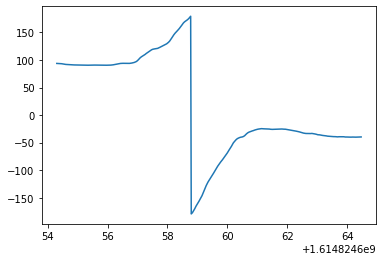

In [123]:
plt.plot(df_yaww['Time'], df_yaww['data'])

In [124]:
# offset by 360 for neg values because -90 deg corresponds to 270 deg East on IMU 
yaw_offset = [x + 360 if x < 0 else x for x in df_yaww['data'] ]

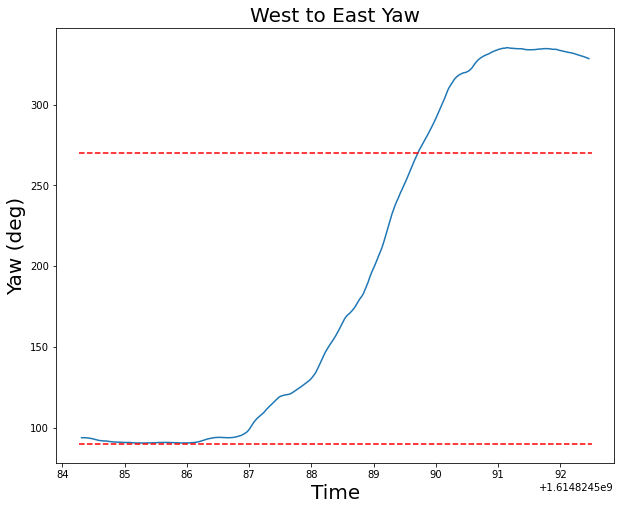

In [125]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title('West to East Yaw', fontsize=20)
plt.plot(df_yaww['Time'][:-100]-70, yaw_offset[:-100])
#plt.plot(df_yaww['Time'][:-100], np.ones(len(df_yaww['Time'][:-100]))*18 + 90, 'r')
plt.axhline(y=270, color='red', xmin=0.04, xmax=0.96, label= 'Zero Accel', linestyle='dashed')
plt.axhline(y=90, color='red', xmin=0.04, xmax=0.96, label= 'Zero Accel', linestyle='dashed')



#ax.set_xticklabels(labels=['0', '2', '4', '6', '8', '10'])


plt.xlabel('Time', fontsize=20)
plt.ylabel('Yaw (deg)', fontsize=20)



plt.show()

In [45]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [ ]:
def wavelets(data, wavelet, uselevels, mode):

    levels = (np.floor(np.log2(Axcorrected.shape[0]))).astype(int)

    omit = levels - uselevels

    coeffs = pywt.wavedec(data, wavelet, level=levels)

    A = pywt.waverec(coeffs[:-omit] + [None] * omit, wavelet, mode=mode)

    return A

Axwave = wavelets(data = Axcorrected, wavelet = 'haar', uselevels = 7, mode = 'zero')

In [252]:
import pywt

In [253]:
coeffs = pywt.wavedec(df_imu['linear_acceleration.x'], wavelet='haar')


In [254]:
len(coeffs)

10

In [255]:
A = pywt.waverec(coeffs[:-3] + [None] * 3, 'haar')

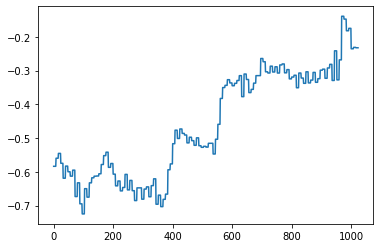

In [256]:
plt.plot(A)

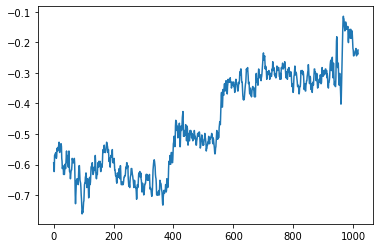

In [257]:
plt.plot(df_imu['linear_acceleration.x'])

In [344]:
N = df_imu['linear_acceleration.x'].size
k = np.linspace(0,N-1,N)

accel_hat = np.fft.fft(df_imu['linear_acceleration.x'])

k_0 = 75
# Low Pass Filter 
h_hat = np.ones(N)
h_hat[k_0 : N-k_0] = 0
g_hat_filter = accel_hat*h_hat

# Inverse DFT
g = np.fft.ifft(g_hat_filter)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


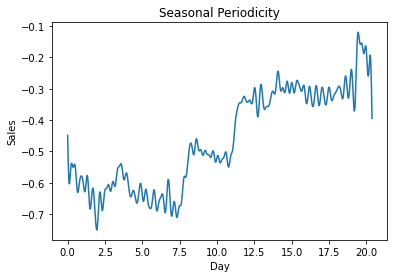

In [345]:
plt.plot(df_imu['Time'], g)
plt.title('Seasonal Periodicity')
plt.ylabel("Sales")
plt.xlabel("Day")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


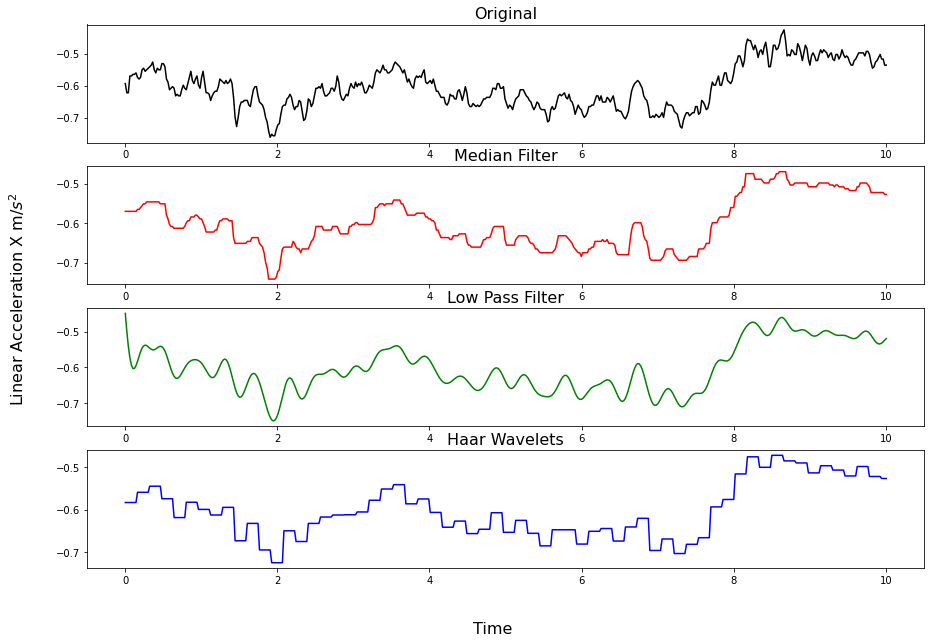

In [346]:
from scipy import signal
med = signal.medfilt(df_imu['linear_acceleration.x'], kernel_size=9)
coeffs = pywt.wavedec(df_imu['linear_acceleration.x'], wavelet='haar')
A = pywt.waverec(coeffs[:-3] + [None] * 3, 'haar')
signal.butter(4, 100, 'low', analog=True)

df_imu['Time'] = df_imu['Time']-df_imu['Time'].min()

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

ax1.plot(df_imu['Time'][:500], df_imu['linear_acceleration.x'][:500], color='black')
ax2.plot(df_imu['Time'][:500], med[:500], color='red')
ax3.plot(df_imu['Time'][:500], g[:500], color='green')
ax4.plot(df_imu['Time'][:500], A[:500], color='blue')

ax1.set_title('Original', fontsize=16)
ax2.set_title('Median Filter', fontsize=16)
ax3.set_title('Low Pass Filter', fontsize=16)
ax4.set_title('Haar Wavelets', fontsize=16)

fig.text(0.5, 0.04, 'Time', ha='center', va='center', fontsize=16)
fig.text(0.06, 0.5, 'Linear Acceleration X m/$s^2$', ha='center', va='center', rotation='vertical', fontsize=16)

plt.show()